# 1. Load the dataset into python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [2]:
df=df.set_index('PassengerId')

# 3. Check the basic details of the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 11)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

<AxesSubplot:xlabel='Age', ylabel='Count'>

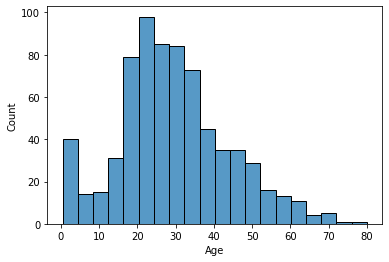

In [7]:
sns.histplot(df['Age'])

In [8]:
df['Age'].skew()

0.38910778230082704

In [9]:
Mean_Age=df['Age'].mean()
Mean_Age

29.69911764705882

In [10]:
df['Age']=df['Age'].fillna(Mean_Age)

In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
cabin_mode=df['Cabin'].mode()
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [13]:
Embarked_mode=df['Embarked'].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [14]:
df['Embarked']=df['Embarked'].fillna(Embarked_mode[0])

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [16]:
z_score_Age=np.abs(stats.zscore(df['Age']))
z_score_Age

PassengerId
1      0.592481
2      0.638789
3      0.284663
4      0.407926
5      0.407926
         ...   
887    0.207709
888    0.823344
889    0.000000
890    0.284663
891    0.177063
Name: Age, Length: 891, dtype: float64

In [17]:
z_score_Survived=np.abs(stats.zscore(df['Survived']))
z_score_Survived

PassengerId
1      0.789272
2      1.266990
3      1.266990
4      1.266990
5      0.789272
         ...   
887    0.789272
888    1.266990
889    0.789272
890    1.266990
891    0.789272
Name: Survived, Length: 891, dtype: float64

In [18]:
z_score_Fare=np.abs(stats.zscore(df['Fare']))
z_score_Fare

PassengerId
1      0.502445
2      0.786845
3      0.488854
4      0.420730
5      0.486337
         ...   
887    0.386671
888    0.044381
889    0.176263
890    0.044381
891    0.492378
Name: Fare, Length: 891, dtype: float64

In [19]:
out_index_Age=np.where(z_score_Age>3)
print(out_index_Age[0])

[ 96 116 493 630 672 745 851]


In [20]:
df=df.drop(out_index_Age[0])
df.shape

(884, 11)

In [21]:
out_index_Survived=np.where(z_score_Survived>3)
print(out_index_Survived[0])

[]


No outliers

In [22]:
out_index_Fare=np.where(z_score_Fare>3)
print(out_index_Fare[0])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]


In [23]:
df=df.drop(out_index_Fare[0])
df.shape

(864, 11)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [24]:
scaler = MinMaxScaler()

In [25]:
df[['Survived']] = scaler.fit_transform(df[['Survived']])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  864 non-null    float64
 1   Pclass    864 non-null    int64  
 2   Name      864 non-null    object 
 3   Sex       864 non-null    object 
 4   Age       864 non-null    float64
 5   SibSp     864 non-null    int64  
 6   Parch     864 non-null    int64  
 7   Ticket    864 non-null    object 
 8   Fare      864 non-null    float64
 9   Cabin     194 non-null    object 
 10  Embarked  864 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 81.0+ KB
